<a href="https://colab.research.google.com/github/oladimeji-kazeem/ITNPAI1/blob/master/Deep_Learning_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Transformation using OpenCV

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
# Adjust figure sizes
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

**Task 1:** Discrete Fourier Transform (Slide 17)

Read images and apply Fourier Transform and visualise. Apply the inverse transform to reconstruct
the image back.

(Text(0.5, 1.0, 'Magnitude Spectrum'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

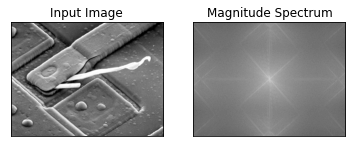

In [ ]:
img = cv2.imread('p4-images/task1.tif', cv2.IMREAD_GRAYSCALE)
# Discrete Fourier Transform
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
# apply shift of origin to center of image
dft_shift = np.fft.fftshift(dft)
# Just show the magnitude
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

### Inverse Fourier Transform

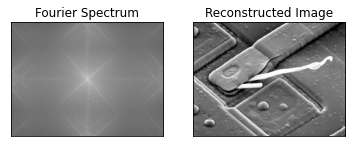

In [ ]:
# Shift back
f_ishift = np.fft.ifftshift(dft_shift)
# Apply inverse transform
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Fourier Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Reconstructed Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Filtering in Fourier domain (Slide 18)

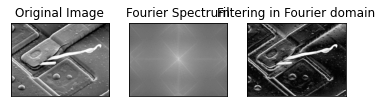

In [ ]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift = dft_shift.copy()
#Make the center frequency = 0. This is equivallent to high pass filtering.
fshift[crow,ccol] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Fourier Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtering in Fourier domain'), plt.xticks([]), plt.yticks([])
plt.show()

**Task 2:** Low Pass Filtering in Fourier domain (Slides 20-26)

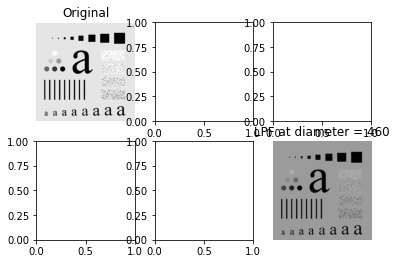

In [ ]:
img = cv2.imread('p4-images/task2.tif', cv2.IMREAD_GRAYSCALE)
# do dft saving as complex output. Use the fast Fourier implementation fft.
dft = np.fft.fft2(img, axes=(0,1))
# apply shift of origin to center of image
dft_shift = np.fft.fftshift(dft)
# create white circle on black background for low pass filter
diameter = [10,30,60,160,460]
radius = [x//2 for x in diameter]
mask = np.zeros_like(img, dtype=np.float64)

cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
fig, ax = plt.subplots(2,3)
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title('Original')
ax[0,0].axis('off')
for i in range(len(radius)):
  cv2.circle(mask, (cx,cy), radius[i], 1, -1)
# antialias mask via blurring.
mask = cv2.GaussianBlur(mask, (21,21), 0) #Comment this line if you use␣ILPF
# apply mask to dft_shift
dft_shift_filtered = np.multiply(dft_shift,mask)
# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift_filtered)
# do idft saving as complex. FFT implementation
img_back = np.fft.ifft2(back_ishift, axes=(0,1))
# combine complex real and imaginary components to form (the magnitude for)␣the original image again
img_back = np.abs(img_back)
# scale result
img_back = cv2.normalize(img_back, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
if i<2:
  ax[0,i+1].imshow(img_back, cmap='gray')
  ax[0,i+1].set_title('LPF at diameter = %1d' %diameter[i])
  ax[0,i+1].axis('off')
else:
  ax[1,i-2].imshow(img_back, cmap='gray')
  ax[1,i-2].set_title('LPF at diameter = %1d' %diameter[i])
  ax[1,i-2].axis('off')

**Task 3:** High Pass Filtering in Fourier domain (Slides 27-30)

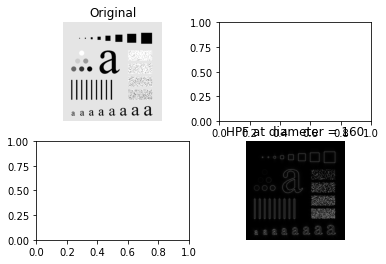

In [ ]:
img = cv2.imread('p4-images/task2.tif', cv2.IMREAD_GRAYSCALE)
# do dft saving as complex output. Use the fast Fourier implementation fft.
dft = np.fft.fft2(img, axes=(0,1))
# apply shift of origin to center of image
dft_shift = np.fft.fftshift(dft)
# create black circle on white background for high pass filter
diameter = [30,60,160]
radius = [x//2 for x in diameter]
mask = np.zeros_like(img, dtype=np.float64)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title('Original')
ax[0,0].axis('off')

for i in range(len(radius)):
  cv2.circle(mask, (cx,cy), radius[i], 1, -1)
# Note this line is different from previous example
mask = 1-mask
# antialias mask via blurring.
mask = cv2.GaussianBlur(mask, (21,21), 0)
# apply mask to dft_shift
dft_shift_filtered = np.multiply(dft_shift,mask)
# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift_filtered)
# do idft saving as complex. FFT implementation
img_back = np.fft.ifft2(back_ishift, axes=(0,1))
# combine complex real and imaginary components to form (the magnitude for)␣the original image again
img_back = np.abs(img_back)
# scale result
img_back = cv2.normalize(img_back, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
if i<1:
  ax[0,1].imshow(img_back, cmap='gray')
  ax[0,1].set_title('HPF at diameter = %1d' %diameter[i])
  ax[0,1].axis('off')
else:
  ax[1,i-1].imshow(img_back, cmap='gray')
  ax[1,i-1].set_title('HPF at diameter = %1d' %diameter[i])
  ax[1,i-1].axis('off')

**Task 3:** Homomorphic filtering (Slide 31, 32)

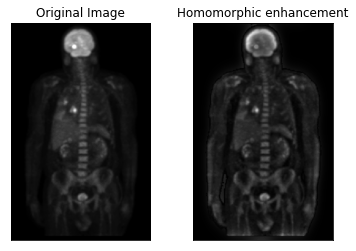

In [ ]:
img = cv2.imread('p4-images/task3.tif', cv2.IMREAD_GRAYSCALE)
# take ln of image
epsilon = 1.0 # epsilon added so that log does not need to deal with zeros
img_log = np.log(np.float64(img+epsilon), dtype=np.float64)
# do dft saving as complex output. Use the fast Fourier implementation fft.
dft = np.fft.fft2(img_log, axes=(0,1))
# apply shift of origin to center of image
dft_shift = np.fft.fftshift(dft)
# create black circle on white background for high pass filter
radius = 5
mask = np.zeros_like(img, dtype=np.float64)
cy = mask.shape[0] // 2

cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, 1, -1)
mask = 1-mask
# antialias mask via blurring.
mask = cv2.GaussianBlur(mask, (21,21), 0)
# apply mask to dft_shift
dft_shift_filtered = np.multiply(dft_shift,mask)
# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift_filtered)
# do idft saving as complex. FFT implementation
img_back = np.fft.ifft2(back_ishift, axes=(0,1))
# combine complex real and imaginary components to form (the magnitude for) the␣original image again
img_back = np.abs(img_back)
# apply exp to reverse the earlier log
img_homomorphic = np.exp(img_back, dtype=np.float64)
# scale result
img_homomorphic = cv2.normalize(img_homomorphic, None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_homomorphic, cmap = 'gray')
plt.title('Homomorphic enhancement'), plt.xticks([]), plt.yticks([])
plt.show()